In [93]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
# loading data
data = sns.load_dataset('tips')

In [95]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [98]:
# The size is not an continuos column need to convert into categorical 
data['size']=data['size'].astype('category')

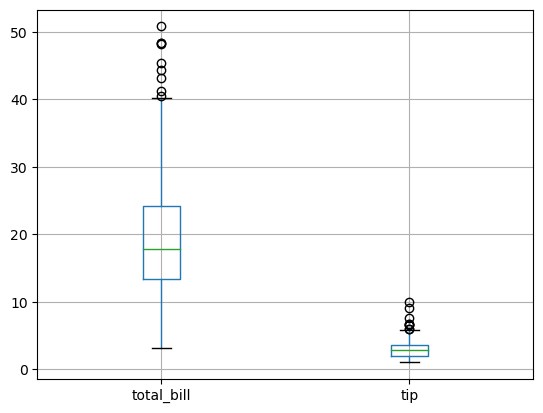

In [99]:
#visually checking for outliers
data.boxplot()
plt.show()

In [100]:
#checking the skewness
data['total_bill'].skew()

1.1332130376158205

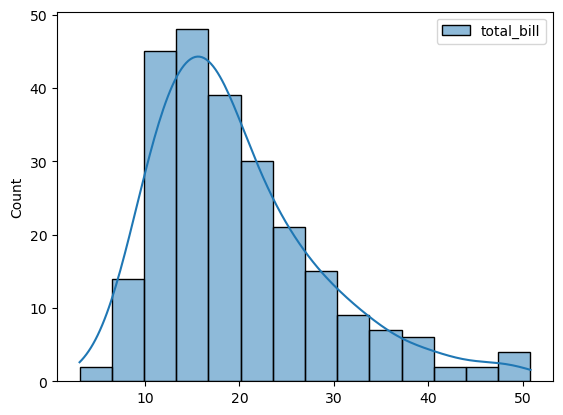

In [101]:
sns.histplot(data[['total_bill']],kde=True)
plt.show()

In [102]:
#finding outliers
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return len(outliers)
find_outliers_IQR(data['total_bill'])

9

In [103]:
# capping the outliers 

In [104]:
# capping 
columns =['total_bill']
for i in columns:
    Q1=data[i].quantile(0.25)
    Q3 =data[i].quantile(0.75)
    IQR = Q3-Q1
    low = Q1 - (1.5 * IQR)
    up = Q3 + (1.5 * IQR)
    data[i] = data[i].apply(lambda x : low if x < low  else  up  if x > up else x)
    print("sucess")
    

sucess


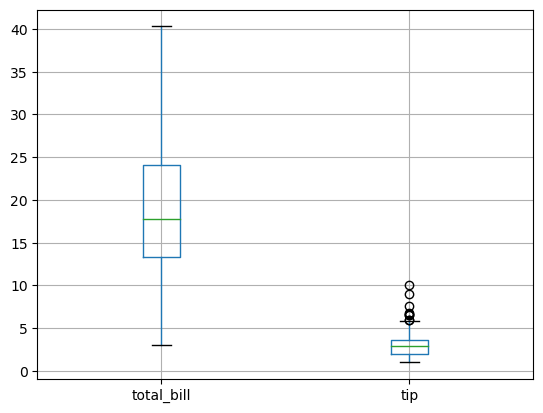

In [105]:
# after capping checkinf for outliers
data.boxplot()
plt.show()

In [106]:
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return len(outliers)
find_outliers_IQR(data['total_bill'])

0

In [107]:
# tip is the targate column so not dealiong with outliers


In [108]:
x = data[['total_bill','sex', 'smoker', 'day', 'time', 'size']]
y = data['tip']


In [114]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [115]:
contCol=["total_bill"]
ordcatcol=["size",'smoker']
norcatcol=["sex","time","day"]
target = ['tip']

In [117]:
# creating pipeline for continues columns
continues_pipeline = Pipeline(steps = [
    ('Roboust_scalar',RobustScaler()),
    ('Yoe_johnson',PowerTransformer())])
# creating pipeline for categorical columns
categorical_nominal_pipeline = Pipeline([
    ('ordinal',OneHotEncoder(drop = 'first'))
])
categorical_ordinal_pipeline = Pipeline(steps = [
    ('ordinal',OrdinalEncoder())])

In [118]:
display(continues_pipeline)

Pipeline(steps=[('Roboust_scalar', RobustScaler()),
                ('Yoe_johnson', PowerTransformer())])

In [119]:
display(categorical_nominal_pipeline)

Pipeline(steps=[('ordinal', OneHotEncoder(drop='first'))])

In [120]:
column_transformation = ColumnTransformer(transformers=[
    ('contnues',continues_pipeline,contCol),
    ('categorical_nominal',categorical_nominal_pipeline,norcatcol),
    ('categorical_ordinal',categorical_ordinal_pipeline,ordcatcol)],remainder = 'drop', n_jobs=-1
    )

In [121]:
display(column_transformation)

ColumnTransformer(n_jobs=-1,
                  transformers=[('contnues',
                                 Pipeline(steps=[('Roboust_scalar',
                                                  RobustScaler()),
                                                 ('Yoe_johnson',
                                                  PowerTransformer())]),
                                 ['total_bill']),
                                ('categorical_nominal',
                                 Pipeline(steps=[('ordinal',
                                                  OneHotEncoder(drop='first'))]),
                                 ['sex', 'time', 'day']),
                                ('categorical_ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['size', 'smoker'])])

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
linear = LinearRegression()

In [124]:
linear_pipeline = Pipeline(steps = [
    ('column_transformation',column_transformation),
    ('linear_regressor',linear)
])

In [126]:
display(linear_pipeline)

Pipeline(steps=[('column_transformation',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('contnues',
                                                  Pipeline(steps=[('Roboust_scalar',
                                                                   RobustScaler()),
                                                                  ('Yoe_johnson',
                                                                   PowerTransformer())]),
                                                  ['total_bill']),
                                                 ('categorical_nominal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'time', 'day']),
                                                 ('categorical_ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['size', 'smoker'])])),
                ('linear_regressor', LinearRegression())])

In [128]:
# spltinng the columns
x = data[contCol+ordcatcol+norcatcol]
y = data[target]

In [129]:
# train test split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.32)

In [130]:
xtrain.shape,xtest.shape,len(ytrain),len(ytest)

((165, 6), (79, 6), 165, 79)

In [131]:
linear_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('column_transformation',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('contnues',
                                                  Pipeline(steps=[('Roboust_scalar',
                                                                   RobustScaler()),
                                                                  ('Yoe_johnson',
                                                                   PowerTransformer())]),
                                                  ['total_bill']),
                                                 ('categorical_nominal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'time', 'day']),
                                                 ('categorical_ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['size', 'smoker'])])),
                ('linear_regressor', LinearRegression())])

In [133]:
ytrainpred = linear_pipeline.predict(xtrain)

In [134]:
ytestpred = linear_pipeline.predict(xtest)

In [135]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytrain, ytrainpred)

0.7274793380302202

In [136]:
mean_squared_error(ytest, ytestpred)

1.817790623709665

In [139]:
from sklearn.metrics import r2_score

r2_score(ytrain, ytrainpred)


0.5614313694574591

In [140]:
r2_score(ytest, ytestpred)

0.24980343945658956